In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import re

In [2]:
trainpath = './data/train'
train_master = pd.read_csv(os.path.join(trainpath, 'Master_Training_Set.csv'), encoding='gbk')
train_userupdateinfo = pd.read_csv(os.path.join(trainpath, 'Userupdate_Info_Training_Set.csv'), encoding='gbk')
train_loginfo = pd.read_csv(os.path.join(trainpath, 'LogInfo_Training_Set.csv'), encoding='gbk')
train_master['source'] = 'train'
train_userupdateinfo['source'] = 'train'
train_loginfo['source'] = 'train'

testpath ='./data/test'
test_master = pd.read_csv(os.path.join(testpath, 'Master_Test_Set.csv'), encoding='gbk')
test_userupdateinfo = pd.read_csv(os.path.join(testpath, 'Userupdate_Info_Test_Set.csv'), encoding='gbk')
test_loginfo = pd.read_csv(os.path.join(testpath, 'LogInfo_Test_Set.csv'), encoding='gbk')
test_master['source'] = 'test'
test_userupdateinfo['source'] = 'test'
test_loginfo['source'] = 'test'

In [3]:
master =pd.concat([train_master, test_master], ignore_index=True)
userupdateinfo = pd.concat([train_userupdateinfo,test_userupdateinfo], ignore_index=True)
loginfo =pd.concat([train_loginfo,test_loginfo],ignore_index=True)



In [4]:
myfont = FontProperties(fname=r"./SIMHEI.TTF",size=12)
master.drop(['WeblogInfo_1' ,'WeblogInfo_3'],axis=1,inplace=True)

[nan  0.  1.]


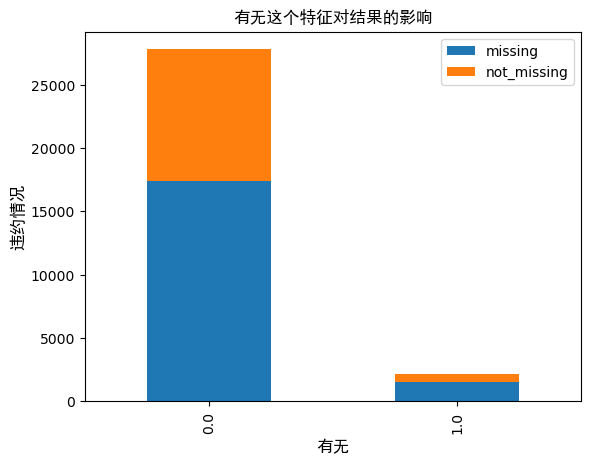

float64
[2. 0. 1.]


In [5]:
## 处理UserInfo_12缺失
print(master['UserInfo_12'].unique())
#fig = plt.figure()
#fig.set(alpha=0.2)
target_UserInfo_12_not = master.target[master.UserInfo_12.isnull()].value_counts()
target_UserInfo_12_ = master.target[master.UserInfo_12.notnull()].value_counts()
df_UserInfo_12 = pd.DataFrame({'missing': target_UserInfo_12_not, 'not_missing': target_UserInfo_12_})
df_UserInfo_12
df_UserInfo_12.plot(kind='bar', stacked=True)
plt.title(u'有无这个特征对结果的影响', fontproperties=myfont)
plt.xlabel(u'有无', fontproperties=myfont)
plt.ylabel(u'违约情况', fontproperties=myfont)
plt.show()
master.loc[(master.UserInfo_12.isnull(), 'UserInfo_12')] = 2.0
#train_master['UserInfo_11'].fillna(2.0)
#train_master['UserInfo_12'] =train_master['UserInfo_12'].astype(np.int32)
print(master['UserInfo_12'].dtypes)
print(master['UserInfo_12'].unique())

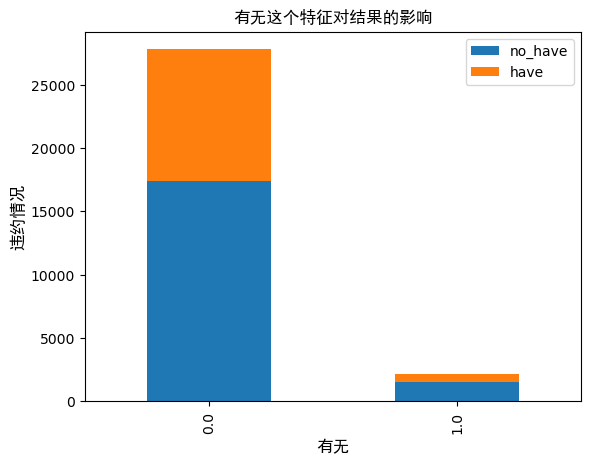

array([2., 0., 1.])

In [6]:
## 处理UserInfo_11缺失
master['UserInfo_11'].unique()
#fig = plt.figure()
#fig.set(alpha=0.2)
target_UserInfo_11_not = master.target[master.UserInfo_11.isnull()].value_counts()
target_UserInfo_11_ = master.target[master.UserInfo_11.notnull()].value_counts()
df_UserInfo_11 = pd.DataFrame({'no_have': target_UserInfo_11_not, 'have': target_UserInfo_11_})
df_UserInfo_11.plot(kind='bar', stacked=True)
plt.title(u'有无这个特征对结果的影响', fontproperties=myfont)
plt.xlabel(u'有无', fontproperties=myfont)
plt.ylabel(u'违约情况', fontproperties=myfont)
plt.show()
#train_master['UserInfo_11'] =train_master['UserInfo_11'].astype(str)
master.loc[(master.UserInfo_11.isnull(), 'UserInfo_11')] = 2.0
master['UserInfo_11'].unique()

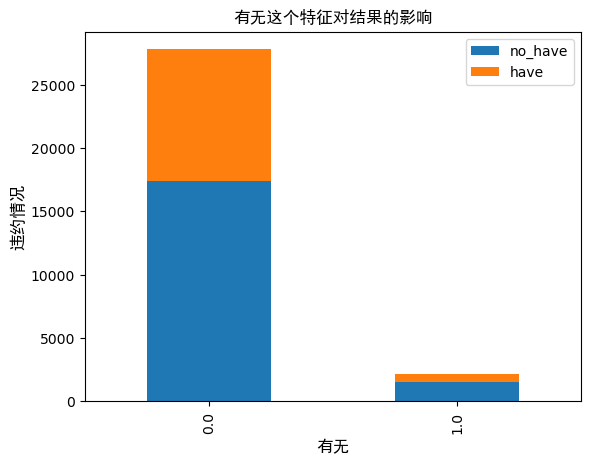

array([2., 1., 0.])

In [7]:
## 处理UserInfo_13缺失
master['UserInfo_13'].unique()
#fig = plt.figure()
#fig.set(alpha=0.2)
target_UserInfo_13_not = master.target[master.UserInfo_13.isnull()].value_counts()
target_UserInfo_13_ = master.target[master.UserInfo_13.notnull()].value_counts()
df_UserInfo_13 = pd.DataFrame({'no_have': target_UserInfo_13_not, 'have': target_UserInfo_13_})
df_UserInfo_13
df_UserInfo_13.plot(kind='bar', stacked=True)
plt.title(u'有无这个特征对结果的影响', fontproperties=myfont)
plt.xlabel(u'有无', fontproperties=myfont)
plt.ylabel(u'违约情况', fontproperties=myfont)
plt.show()
#train_master['UserInfo_13'] =train_master['UserInfo_13'].astype(str)
master.loc[(master.UserInfo_13.isnull(), 'UserInfo_13')] = 2.0
master['UserInfo_13'].unique()

['I5' nan 'I4' 'C19' 'I3' 'U' 'C21' 'C20' 'F13' 'C1' 'C11' 'C12' 'C18'
 'C15' 'O' 'C17' 'F12' 'F9' 'C16' 'I10' 'C13' 'F11' 'F16' 'F7' 'C14' 'I6'
 'F14' 'F10' 'C38' 'F15' 'I11' 'I7' 'C39' 'F6' 'F3' 'C32' 'I8' 'F8' 'F4'
 'I2' 'F1' 'I1' 'F27' 'F2']


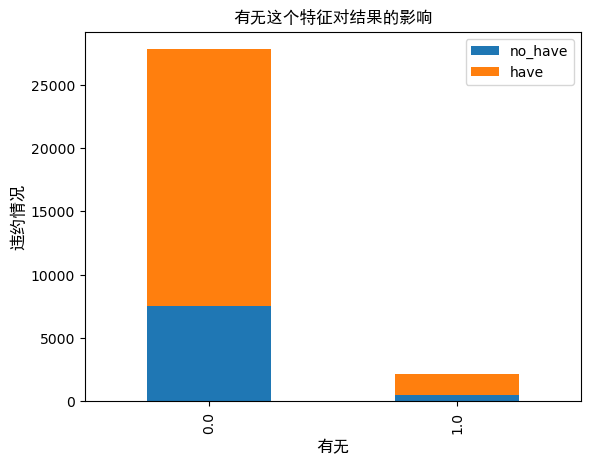

array(['I5', '不详', 'I4', 'C19', 'I3', 'U', 'C21', 'C20', 'F13', 'C1',
       'C11', 'C12', 'C18', 'C15', 'O', 'C17', 'F12', 'F9', 'C16', 'I10',
       'C13', 'F11', 'F16', 'F7', 'C14', 'I6', 'F14', 'F10', 'C38', 'F15',
       'I11', 'I7', 'C39', 'F6', 'F3', 'C32', 'I8', 'F8', 'F4', 'I2',
       'F1', 'I1', 'F27', 'F2'], dtype=object)

In [8]:
## 处理WeblogInfo_20 缺失
print(master['WeblogInfo_20'].unique())
#fig = plt.figure()
#fig.set(alpha=0.2)
target_WeblogInfo_20_not = master.target[master.WeblogInfo_20.isnull()].value_counts()
target_WeblogInfo_20_ = master.target[master.WeblogInfo_20.notnull()].value_counts()
df_WeblogInfo_20 = pd.DataFrame({'no_have': target_WeblogInfo_20_not, 'have': target_WeblogInfo_20_})
df_WeblogInfo_20
df_WeblogInfo_20.plot(kind='bar', stacked=True)
plt.title(u'有无这个特征对结果的影响', fontproperties=myfont)
plt.xlabel(u'有无', fontproperties=myfont)
plt.ylabel(u'违约情况', fontproperties=myfont)
plt.show()
#train_master['WeblogInfo_20'] =train_master['WeblogInfo_20'].astype(str)
master.loc[(master.WeblogInfo_20.isnull(), 'WeblogInfo_20')] = u'不详'
master['WeblogInfo_20'].unique()

['I' 'E' 'F' 'D' 'J' 'G' 'H' nan]


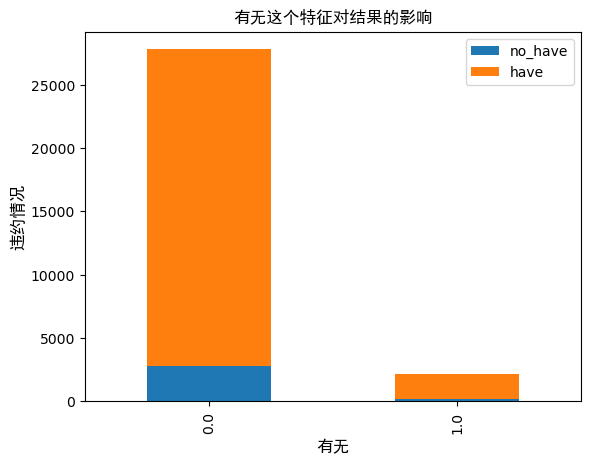

array(['I', 'E', 'F', 'D', 'J', 'G', 'H', '不详'], dtype=object)

In [9]:
print(master['WeblogInfo_19'].unique())
#fig = plt.figure()
#fig.set(alpha=0.2)
target_WeblogInfo_19_not = master.target[master.WeblogInfo_19.isnull()].value_counts()
target_WeblogInfo_19_ = master.target[master.WeblogInfo_19.notnull()].value_counts()
df_WeblogInfo_19 = pd.DataFrame({'no_have': target_WeblogInfo_19_not, 'have': target_WeblogInfo_19_})
df_WeblogInfo_19

df_WeblogInfo_19.plot(kind='bar', stacked=True)
plt.title(u'有无这个特征对结果的影响', fontproperties=myfont)
plt.xlabel(u'有无', fontproperties=myfont)
plt.ylabel(u'违约情况', fontproperties=myfont)
plt.show()

#train_master['WeblogInfo_19'] =train_master['WeblogInfo_19'].astype(str)
master.loc[(master.WeblogInfo_19.isnull(), 'WeblogInfo_19')] = u'不详'
master['WeblogInfo_19'].unique()

['D' 'C' 'A' 'B' nan]


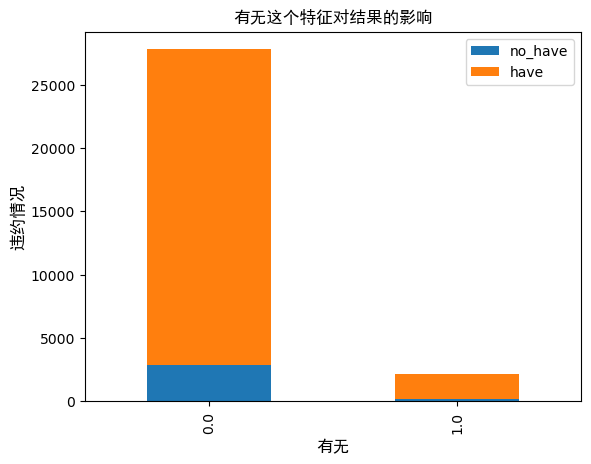

array(['D', 'C', 'A', 'B', '0'], dtype=object)

In [10]:
## 处理WeblogInfo_21 缺失
print(master['WeblogInfo_21'].unique())
#fig = plt.figure()
#fig.set(alpha=0.2)
target_WeblogInfo_21_not = master.target[master.WeblogInfo_21.isnull()].value_counts()
target_WeblogInfo_21_ = master.target[master.WeblogInfo_21.notnull()].value_counts()
df_WeblogInfo_21 = pd.DataFrame({'no_have': target_WeblogInfo_21_not, 'have': target_WeblogInfo_21_})
df_WeblogInfo_21

df_WeblogInfo_21.plot(kind='bar', stacked=True)
plt.title(u'有无这个特征对结果的影响', fontproperties=myfont)
plt.xlabel(u'有无', fontproperties=myfont)
plt.ylabel(u'违约情况', fontproperties=myfont)
plt.show()
#train_master['WeblogInfo_21'] =train_master['WeblogInfo_21'].astype(str)
master.loc[(master.WeblogInfo_21.isnull(), 'WeblogInfo_21')] = '0'
master['WeblogInfo_21'].unique()

In [11]:
## 其余缺失值很少的就用均值或众数填充
len(master['UserInfo_2'].value_counts())  ## 城市地理位置
len(master['UserInfo_4'].value_counts())  ## 城市地理位置
len(master['UserInfo_8'].value_counts())  ## 城市地理位置
len(master['UserInfo_9'].unique())  ## 城市地理位置
len(master['UserInfo_20'].value_counts())  ## 城市地理位置
len(master['UserInfo_7'].unique())  ## 省份地理位置
len(master['UserInfo_19'].unique()) 
## 省份地理位置
# 如果选择以0填充，下述部分就维持现状，如果选择中位数/众数填充，就把下述的部分注释掉
master.loc[(master.UserInfo_2.isnull(), 'UserInfo_2')] = '0'
master.loc[(master.UserInfo_4.isnull(), 'UserInfo_4')] = '0'
master.loc[(master.UserInfo_8.isnull(), 'UserInfo_8')] = '0'
master.loc[(master.UserInfo_9.isnull(), 'UserInfo_9')] = '0'
master.loc[(master.UserInfo_20.isnull(), 'UserInfo_20')] = '0'
master.loc[(master.UserInfo_7.isnull(), 'UserInfo_7')] = '0'
master.loc[(master.UserInfo_19.isnull(), 'UserInfo_19')] = '0'

In [12]:
 ## 用众数填充缺失值
categoric_cols = ['UserInfo_1' ,'UserInfo_2' ,'UserInfo_3' ,'UserInfo_4' , 'UserInfo_5' ,'UserInfo_6','UserInfo_7','UserInfo_8','UserInfo_9','UserInfo_11','UserInfo_12','UserInfo_13','UserInfo_14','UserInfo_15','UserInfo_16','UserInfo_17','UserInfo_19','UserInfo_20','UserInfo_21','UserInfo_22','UserInfo_23','UserInfo_24','Education_Info1','Education_Info2','Education_Info3','Education_Info4','Education_Info5','Education_Info6','Education_Info7','Education_Info8','WeblogInfo_19','WeblogInfo_20','WeblogInfo_21','SocialNetwork_1','SocialNetwork_2','SocialNetwork_7','SocialNetwork_12']
# for col in categoric_cols:
#     mode_cols = master[col].mode()[0]
#     master.loc[(master[col].isnull() , col)] = mode_cols 
numeric_cols = master.select_dtypes(include='number').columns
categorical_cols = master.select_dtypes(exclude='number').columns
## 用均值填充缺失值 
# non_numeric_cols = ['UserInfo_2', 'UserInfo_4', 'UserInfo_7', 'UserInfo_8','UserInfo_9','UserInfo_19','UserInfo_20','UserInfo_22','UserInfo_23','UserInfo_24','Education_Info2','Education_Info3','Education_Info4','Education_Info6','Education_Info7','Education_Info8','WeblogInfo_19','WeblogInfo_20','WeblogInfo_21']
# numeric_cols=[i for i in categoric_cols if i not in non_numeric_cols]
for col in master.columns:
    if col not in categoric_cols and col !=u'Idx' and col !=u'target'and col !='source' and col !='ListingInfo':
        mean_cols = master[col].mean()
        master.loc[(master[col].isnull() , col)] = mean_cols


In [13]:
## 剔除标准差几乎为零的特征项
feature_std = master[numeric_cols].std().sort_values(ascending=True)
print(feature_std.head(20))
columns_to_drop = feature_std[(feature_std < 0.1) & (feature_std.index != 'target')].index
master.drop(columns_to_drop, axis=1, inplace=True)
numeric_cols=[i for i in numeric_cols if i not in columns_to_drop]
master['Idx'] = master['Idx'].astype(np.int32)


WeblogInfo_10      0.000000
WeblogInfo_49      0.008165
WeblogInfo_44      0.016830
WeblogInfo_41      0.022355
WeblogInfo_46      0.030266
WeblogInfo_55      0.033408
WeblogInfo_43      0.036037
SocialNetwork_1    0.037618
WeblogInfo_47      0.040592
WeblogInfo_52      0.048962
WeblogInfo_58      0.059251
WeblogInfo_40      0.068520
WeblogInfo_32      0.080617
WeblogInfo_31      0.081993
WeblogInfo_23      0.092906
WeblogInfo_54      0.099264
WeblogInfo_35      0.101069
WeblogInfo_53      0.109578
WeblogInfo_37      0.109805
WeblogInfo_26      0.114246
dtype: float64


In [14]:
# 去掉空格
master['UserInfo_9'] = master['UserInfo_9'].apply(lambda x: x.strip())
## 去掉大小写
userupdateinfo['UserupdateInfo1'] =userupdateinfo['UserupdateInfo1'].apply(lambda x:x.lower())
## 将UserInfo_8中城市名归一化
def encodingstr(s):
    regex = re.compile(r'.+市')
    if regex.search(s):
        s = s[:-1]
        return s
    else:
        return s
def encodingregion(s):
    special = ['内蒙古自治区', '宁夏回族自治区', '广西壮族自治区', '新疆维吾尔自治区']
    ret = ['内蒙古', '宁夏', '广西', '新疆']
    for i in range(len(special)):
        if s == special[i]:
            return ret[i]
    regex1 = re.compile(r'.+省')
    regex2 = re.compile(r'.+市')
    if regex1.search(s):
        s = s[:-1]
        return s
    elif regex2.search(s):
        s = s[:-1]
        return s
    else:
        return s

print(master['UserInfo_2'].nunique())
print(master['UserInfo_4'].nunique())
print(master['UserInfo_7'].nunique())
print(master['UserInfo_19'].nunique())
print(master['UserInfo_8'].nunique())
print(master['UserInfo_20'].nunique())

master['UserInfo_2'] = master['UserInfo_2'].apply(lambda x: encodingstr(x))
master['UserInfo_4'] = master['UserInfo_4'].apply(lambda x: encodingstr(x))
master['UserInfo_7'] = master['UserInfo_7'].apply(lambda x: encodingregion(x))
master['UserInfo_19'] = master['UserInfo_19'].apply(lambda x: encodingregion(x))
master['UserInfo_8'] = master['UserInfo_8'].apply(lambda x: encodingstr(x))
master['UserInfo_20'] = master['UserInfo_20'].apply(lambda x: encodingstr(x))
userupdateinfo.to_csv('./userupdateinfo.csv', index=False, encoding='utf-8')

print(master.columns)


334
335
32
31
675
313
Index(['Idx', 'UserInfo_1', 'UserInfo_2', 'UserInfo_3', 'UserInfo_4',
       'WeblogInfo_2', 'WeblogInfo_4', 'WeblogInfo_5', 'WeblogInfo_6',
       'WeblogInfo_7',
       ...
       'SocialNetwork_11', 'SocialNetwork_12', 'SocialNetwork_13',
       'SocialNetwork_14', 'SocialNetwork_15', 'SocialNetwork_16',
       'SocialNetwork_17', 'target', 'ListingInfo', 'source'],
      dtype='object', length=211)


In [15]:
std_threshold = 3  # 阈值为均值的3倍标准差
for col in numeric_cols:
    if col != 'Idx' and col != 'target' and col != 'source' and col != 'ListingInfo':
        mean = master[col].mean()
        std = master[col].std()
        # 识别离群点
        outliers = master[abs(master[col] - mean) > std_threshold * std]
        # 用均值替换离群点
        master.loc[abs(master[col] - mean) > std_threshold * std, col] = mean


In [16]:
userupdateinfo.to_csv('./userupdateinfo.csv',index=False,encoding='utf-8')

In [17]:
## 借款日期离散化
# 把月、日、单独拎出来，放到3列中
master['month'] = pd.DatetimeIndex(master.ListingInfo).month
master['day']  = pd.DatetimeIndex(master.ListingInfo).day
master['day'].head()
master.drop(['ListingInfo'],axis=1,inplace=True)
master['target'] = master['target'].astype(str)
master.to_csv('./master.csv',index=False,encoding='utf-8')

C:\Users\Redamancy\AppData\Local\Temp\ipykernel_23648\1075863191.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  master['month'] = pd.DatetimeIndex(master.ListingInfo).month
C:\Users\Redamancy\AppData\Local\Temp\ipykernel_23648\1075863191.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  master['day']  = pd.DatetimeIndex(master.ListingInfo).day


In [18]:
# import matplotlib.pyplot as plt
# 
# for col in categoric_cols:
#     plt.hist(master[col], bins=20)
#     plt.xlabel(col)
#     plt.ylabel("Frequency")
#     plt.show()

In [19]:
def get_city_tier(city):
    first_tier = ['北京', '上海', '广州', '深圳']
    new_first_tier = ['成都', '重庆', '杭州', '武汉', '西安', '郑州', '青岛', '长沙', '天津', '苏州', '南京', '东莞',
                      '沈阳', '合肥', '佛山']
    second_tier = ['昆明', '福州', '无锡', '厦门', '哈尔滨', '长春', '南昌', '济南', '宁波', '大连', '贵阳', '温州',
                   '石家庄', '泉州', '南宁', '金华', '常州', '珠海', '惠州', '嘉兴', '南通', '中山', '保定', '兰州',
                   '台州', '徐州', '太原', '绍兴', '烟台', '廊坊']
    third_tier = ['海口', '汕头', '潍坛', '扬州', '洛阳', '乌鲁木齐', '临沂', '唐山', '镇江', '盐城', '湖州', '赣州',
                  '漳州', '揭阳', '江门', '桂林', '邯郸', '泰州', '济宁', '呼和浩特', '咸阳', '芜湖', '三亚', '阜阳',
                  '淮安', '遵义', '银川', '衡阳', '上饶', '柳州', '淄博', '莆田', '绵阳', '湛江', '商丘', '宜昌',
                  '沧州', '连云港', '南阳', '蚌埠', '驻马店', '滁州', '邢台', '潮州', '秦皇岛', '肇庆', '荆州', '周口',
                  '马鞍山', '清远', '宿州', '威海', '九江', '新乡', '信阳', '襄阳', '岳阳', '安庆', '菏泽', '宜春',
                  '黄冈', '泰安', '宿迁', '株洲', '宁德', '鞍山', '南充', '六安', '大庆', '舟山']
    fourth_tier = ['常德', '渭南', '孝感', '丽水', '运城', '德州', '张家口', '鄂尔多斯', '阳江', '泸州', '丹东', '曲靖',
                   '乐山', '许昌', '湘潭', '晋中', '安阳', '齐齐哈尔', '北海', '宝鸡', '抚州', '景德镇', '延安', '三明',
                   '抚顺', '亳州', '日照', '西宁', '衢州', '拉萨', '淮北', '焦作', '平顶山', '滨州', '吉安', '濮阳',
                   '眉山', '池州', '荆门', '铜仁', '长治', '衡水', '铜陵', '承德', '达州', '邵阳', '德阳', '龙岩',
                   '南平', '淮南', '黄石', '营口', '东营', '吉林', '韶关', '枣庄', '包头', '怀化', '宣城', '临汾',
                   '聊城', '梅州', '盘锦', '锦州', '榆林', '玉林', '十堰', '汕尾', '咸宁', '宜宾', '永州', '益阳',
                   '黔南州', '黔东南', '恩施', '红河', '大理', '大同', '鄂州', '忻州', '吕梁', '黄山', '开封', '郴州',
                   '茂名', '漯河', '葫芦岛', '河源', '娄底', '延边']

    if city in first_tier:
        return 1
    elif city in new_first_tier:
        return 2
    elif city in second_tier:
        return 3
    elif city in third_tier:
        return 4
    elif city in fourth_tier:
        return 5
    elif city == '不详':
        return 6
    return None


city_col = ['UserInfo_2', 'UserInfo_4', 'UserInfo_8', 'UserInfo_20']
for col in city_col:
    master[col] = master[col].apply(get_city_tier)
    mode_value = master[col].mode()[0]
    master[col].fillna(mode_value, inplace=True)
    print(master[col].head(5))

0    1.0
1    3.0
2    4.0
3    5.0
4    4.0
Name: UserInfo_2, dtype: float64
0    1.0
1    3.0
2    4.0
3    5.0
4    4.0
Name: UserInfo_4, dtype: float64
0    1.0
1    3.0
2    4.0
3    5.0
4    4.0
Name: UserInfo_8, dtype: float64
0    4.0
1    6.0
2    4.0
3    6.0
4    5.0
Name: UserInfo_20, dtype: float64


In [20]:
# 是否为**省
my_alpha = 0.05

province_col = ['UserInfo_7', 'UserInfo_19']
province_info = pd.DataFrame(columns=['Province', 'y_sum', 'num', 'grade'])
master['target'] = pd.to_numeric(master['target'], errors='coerce')
co = master['UserInfo_7']
sum_y = master.groupby(co)['target'].sum().reset_index()


In [21]:
num = master.groupby(co).size().reset_index()
province_info['Province'] = master.groupby(co).groups.keys()
province_info['y_sum'] = sum_y['target'].astype(int)
province_info['num'] = num[0].astype(int)
province_info['grade'] = (province_info['y_sum'] / province_info['num'] * 1000).astype(int)
# province_info['grade'] = province_info['y_sum'] / province_info['num']
filtered_province_info = province_info[province_info['grade'] > 20]
print(filtered_province_info)
province_names = filtered_province_info['Province']
print(province_names)
print(master.shape)
# 遍历每个省份，如果 'UserInfo_7' 列的值等于该省份名称，对应列设置为1，否则为0
for col in province_col:
    col = master[col]
    for province in province_names:
        column_name = f'is_{province}'  # 根据省份名称创建列名
        master[column_name] = (col == province).astype(int)

print(master.shape)

   Province  y_sum   num  grade
0        上海      3    80     37
1        不详    336  8535     39
3       内蒙古     19   784     24
4        北京     32  1272     25
5        吉林     25   609     41
6        四川    109  2281     47
7        天津     20   377     53
8        宁夏      8   303     26
9        安徽     68  1715     39
10       山东    228  4094     55
11       山西     47  1520     30
12       广东    287  7741     37
13       广西     43  1679     25
15       江苏    140  3426     40
16       江西     46  1309     35
17       河北     71  1837     38
18       河南     84  2453     34
19       浙江    115  4397     26
20       海南     15   350     42
21       湖北     84  2066     40
22       湖南    102  2158     47
23       甘肃     15   579     25
24       福建    105  3708     28
26       贵州     25   924     27
27       辽宁     48  1165     41
28       重庆     34   911     37
29       陕西     33  1069     30
31      黑龙江     30   916     32
0      上海
1      不详
3     内蒙古
4      北京
5      吉林
6      四川
7      天津
8 

C:\Users\Redamancy\AppData\Local\Temp\ipykernel_23648\4277027665.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  master[column_name] = (col == province).astype(int)
C:\Users\Redamancy\AppData\Local\Temp\ipykernel_23648\4277027665.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  master[column_name] = (col == province).astype(int)
C:\Users\Redamancy\AppData\Local\Temp\ipykernel_23648\4277027665.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

In [22]:
from collections import defaultdict
import datetime as dt

##  userupdateinfo表
userupdate_info_number = defaultdict(list)  ### 用户信息更新的次数
userupdate_info_category = defaultdict(set)  ###用户信息更新的种类数
userupdate_info_times = defaultdict(list)  ### 用户分几次更新了
userupdate_info_date = defaultdict(list)  #### 用户借款成交与信息更新时间跨度
with open('./userupdateinfo.csv', 'r') as f:
    f.readline()
    for line in f.readlines():
        cols = line.strip().split(",")  ### cols 是list结果
        userupdate_info_date[cols[0]].append(cols[1])
        userupdate_info_number[cols[0]].append(cols[2])
        userupdate_info_category[cols[0]].add(cols[2])
        userupdate_info_times[cols[0]].append(cols[3])
    print(u'提取信息完成')




提取信息完成


In [23]:
userupdate_info_number_ = defaultdict(int)  ### 用户信息更新的次数
userupdate_info_category_ = defaultdict(int)  ### 用户信息更新的种类数
userupdate_info_times_ = defaultdict(int)  ### 用户分几次更新了
userupdate_info_date_ = defaultdict(int)  #### 用户借款成交与信息更新时间跨度
for key in userupdate_info_date.keys():
    userupdate_info_times_[key] = len(set(userupdate_info_times[key]))
    delta_date = dt.datetime.strptime(userupdate_info_date[key][0], '%Y/%m/%d') - dt.datetime.strptime(
        list(set(userupdate_info_times[key]))[0], '%Y/%m/%d')
    userupdate_info_date_[key] = abs(delta_date.days)
    userupdate_info_number_[key] = len(userupdate_info_number[key])
    userupdate_info_category_[key] = len(userupdate_info_category[key])

print('信息处理完成')


信息处理完成


In [24]:
## 建立一个DataFrame
Idx_ = list(userupdate_info_date_.keys())  #### list
numbers_ = list(userupdate_info_number_.values())
categorys_ = list(userupdate_info_category_.values())
times_ = list(userupdate_info_times_.values())
dates_ = list(userupdate_info_date_.values())
userupdate_df = pd.DataFrame(
    {'Idx': Idx_, 'numbers': numbers_, 'categorys': categorys_, 'times': times_, 'dates': dates_})
userupdate_df.head()
userupdate_df.to_csv('./userupdate_df.csv', index=False, encoding='utf-8')

In [25]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_validate, GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as preprocessing
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [26]:
master = pd.read_csv('./master.csv',encoding='utf-8')
userupdateinfo = pd.read_csv('./userupdate_df.csv',encoding='utf-8')
#train_loginfo = pd.read_csv('./loginfo_df.csv',encoding='utf-8')

In [27]:
all = pd.merge(master, userupdateinfo, how='left', on='Idx')
#train_all = pd.merge(train_all, train_loginfo, how='left', on='Idx')


In [28]:
import warnings
warnings.filterwarnings("ignore")
all['target'].fillna(-1, inplace=True)
all['Idx'] = all['Idx'].astype(np.int64)
all['target'] = all['target'].astype(np.int64)
all = pd.get_dummies(all)


In [29]:
## 填充缺失值
features_to_fillna = all.columns
# 用平均值来填充
all[features_to_fillna] = all[features_to_fillna].fillna(all[features_to_fillna].mean())
## 对数值型特征进行scaling
import warnings
from sklearn.preprocessing import StandardScaler
# 创建一个标准化器
scaler = StandardScaler()
# 选择需要缩放的数值型特征列，例如选择所有数值型特征
numeric_features = all.select_dtypes(include=['number']).columns
numeric_features = [feature for feature in numeric_features if feature != 'Idx' and feature !='target']
# 对数值型特征进行缩放
all[numeric_features] = scaler.fit_transform(all[numeric_features])
warnings.filterwarnings("ignore")

In [30]:
# 拆分数据集回训练集和测试集
train_data = all[all['source_test'] == False]
test_data = all[all['source_test'] == True]
train_data.drop(['source_test','source_train'],axis=1,inplace=True)
test_data.drop(['source_test','source_train'],axis=1,inplace=True)


In [31]:
y_train=train_data['target']
test_data.drop(['target'],axis=1,inplace=True)
train_data.drop(['target'],axis=1,inplace=True)

# xgboost

200

关于现在这个模型
准确率 : 0.9404
AUC 得分 (训练集): 0.980698
f84     196.0
f188    183.0
f118    170.0
f189    170.0
f27     161.0
f72     157.0
f57     154.0
f67     153.0
f88     151.0
f125    149.0
f91     148.0
f75     145.0
f55     144.0
f92     144.0
f70     143.0
f71     141.0
f73     140.0
f60     138.0
f108    135.0
f74     134.0
f65     134.0
f86     134.0
f77     133.0
f87     132.0
f106    131.0
dtype: float64
(434,)


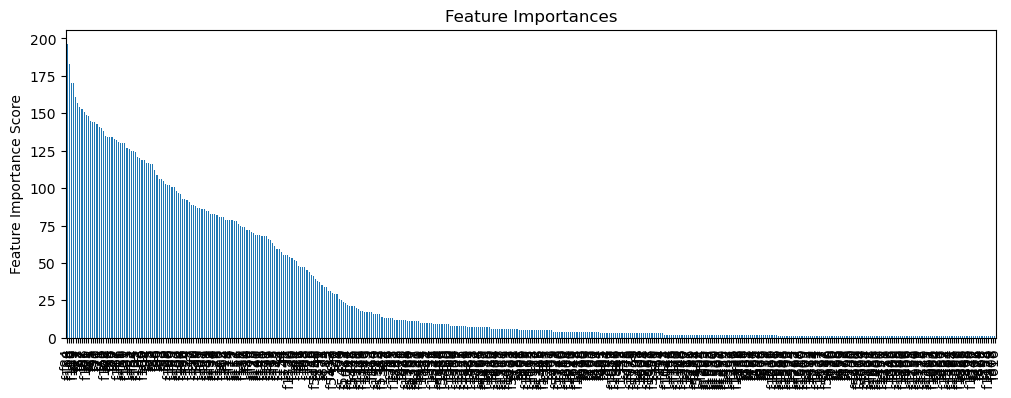

In [32]:
def modelfit(alg, dtrain, y_train, dtest=None, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values[:, 1:], label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    #建模
    alg.fit(dtrain.values[:, 1:], y_train, eval_metric='auc')

    #对训练集预测
    dtrain_predictions = alg.predict(dtrain.values[:, 1:])
    dtrain_predprob = alg.predict_proba(dtrain.values[:, 1:])[:, 1]

    #输出模型的一些结果
    print(cvresult.shape[0])
    print("\n关于现在这个模型")
    print("准确率 : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
    print("AUC 得分 (训练集): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))

    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    print(feat_imp.head(25))
    print(feat_imp.shape)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


xgb1 = XGBClassifier(
    learning_rate=0.04,
    n_estimators=200,
    max_depth=7,
    min_child_weight=1.0,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

modelfit(xgb1, train_data, y_train)

In [33]:
xgb_yprob = xgb1.predict_proba(test_data.values[:, 1:])[:, 1]
xgb_result = pd.DataFrame({'ID': test_data.values[:, 0], 'Prediction':xgb_yprob})
xgb_result
xgb_result.to_csv('xgb_result.csv', encoding='utf-8')

In [34]:
train_data.isnull().sum().sort_values(ascending=False).head(10)
features_to_fillna = train_data.columns
# 用平均值来填充
train_data[features_to_fillna] =train_data[features_to_fillna].fillna(train_data[features_to_fillna].mean())
train_data.isnull().sum().sort_values(ascending=False).head(10)

Idx                            0
UserInfo_24_江西省新干县七琴镇          0
UserInfo_24_江西省泰和县沙村镇          0
UserInfo_24_江西省泰和县上圯乡芫头村       0
UserInfo_24_江西省永新县芦溪乡合东村       0
UserInfo_24_江西省永修县松山纺织器材厂西路    0
UserInfo_24_江西省樟树市药都路          0
UserInfo_24_江西省景德镇市珠山区         0
UserInfo_24_江西省新建县长_镇          0
UserInfo_24_江西省新建县乐化镇黄墩村       0
dtype: int64

# RandomForest

In [35]:
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")
rf0 = RandomForestClassifier(oob_score=True, random_state=42, min_samples_split=5, min_samples_leaf=2) 
rf0.fit(train_data.values[:, 1:], y_train)
print(rf0.oob_score_)
y_predprob = rf0.predict_proba(train_data.values[:, 1:])[:, 1]
print('AUC Score(Train): %f' % metrics.roc_auc_score(y_train, y_predprob))


0.9267333333333333
AUC Score(Train): 0.999999


In [36]:
rf_pred=rf0.predict_proba(train_data.values[:, 1:])[:,1].astype(float)
result_rf = pd.DataFrame({'ID': test_data.values[:, 0], 'Prediction': rf_pred})
result_rf
result_rf.to_csv('result_rf.csv',encoding='utf-8')

In [37]:
import warnings

warnings.filterwarnings("ignore")
lr = LogisticRegression(tol=1e-6)
parameters = {'penalty': ('l1', 'l2'), 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
clf_lr = GridSearchCV(lr, parameters, cv=3)
print('开始训练')
clf_lr.fit(train_data.values[:, 1:], y_train)
print('模型训练结束')
clf_lr
import warnings

warnings.filterwarnings("ignore")
clf_lr_accuracy = clf_lr.score(train_data.values[:, 1:], y_train)
print(clf_lr_accuracy)
clf_lr.cv_results_, clf_lr.best_params_, clf_lr.best_score_

开始训练
模型训练结束
0.9266666666666666


({'mean_fit_time': array([ 6.2210079 , 11.32612109,  6.19520656, 15.71438336,  6.16639551,
         16.10355337,  6.14375091, 17.19088101,  6.14827029, 16.07239342,
          6.14096697, 16.03649632]),
  'std_fit_time': array([0.02586353, 0.15817292, 0.03265497, 0.45880356, 0.0281217 ,
         0.17797305, 0.02435135, 0.852151  , 0.03648813, 0.17409282,
         0.01540399, 0.09515203]),
  'mean_score_time': array([0.        , 1.35387754, 0.        , 1.34633843, 0.        ,
         1.36293968, 0.        , 1.40629546, 0.        , 1.34998775,
         0.        , 1.33829284]),
  'std_score_time': array([0.        , 0.0164123 , 0.        , 0.00274306, 0.        ,
         0.01355841, 0.        , 0.04031305, 0.        , 0.0057228 ,
         0.        , 0.00978524]),
  'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                     100],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, 

# lightgbm


In [38]:
import lightgbm as lgb
from sklearn import metrics

def train_lightgbm(train_data, y_train, params=None, num_boost_round=100):
    if params is None:
        params = {
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'num_leaves': 40,
            'learning_rate': 0.02,
            'feature_fraction': 0.2,
            'max_depth':11,
            'reg_alpha':0.4,
            'reg_lambda':0.4,
            'n_estimators':500,
        }

    lgb_train = lgb.Dataset(train_data, label=y_train)
    model = lgb.train(params, lgb_train, num_boost_round=num_boost_round)

    # 预测概率
    y_pred = model.predict(train_data)

    # 计算AUC
    auc_score = metrics.roc_auc_score(y_train, y_pred)

    return model, auc_score

# 调用函数进行训练
lgbmodel, auc = train_lightgbm(train_data, y_train)
print(f'AUC Score: {auc}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2198, number of negative: 27802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25397
[LightGBM] [Info] Number of data points in the train set: 30000, number of used features: 1389
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.073267 -> initscore=-2.537560
[LightGBM] [Info] Start training from score -2.537560
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
AUC Score: 0.9796288737222053


In [39]:
lgbmodel.predict(test_data)

array([0.15461557, 0.11787013, 0.14026357, ..., 0.01116411, 0.28277881,
       0.04073585])

In [40]:
yprob_lgb = lgbmodel.predict(test_data)
result_lgb = pd.DataFrame({'ID': test_data.values[:, 0], 'Prediction': yprob_lgb})
result_lgb
result_lgb.to_csv('result_lgb.csv',encoding='utf-8')

# 逻辑回归


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def logistic_regression(train_data, y_train):
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(train_data.values[:,1:], y_train, test_size=0.2, random_state=42)
    # 创建逻辑回归模型
    model = LogisticRegression()
    # 训练模型
    model.fit(X_train, y_train)
    # 预测
    y_pred = model.predict(X_test)
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    # 计算AUC分数
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print("准确率:", accuracy)
    print("AUC分数:", auc_score)
    # 返回准确率和AUC分数
    return model

# 使用示例
logisticmodel =logistic_regression(train_data, y_train)


准确率: 0.9203333333333333
AUC分数: 0.7021580765770651


In [42]:
lg_pred =logisticmodel.predict_proba(test_data.values[:, 1:])[:, 1].astype(float)
result_logistic = pd.DataFrame({'ID': test_data.values[:, 0], 'Prediction': lg_pred})
result_logistic
result_logistic.to_csv('result_logistic.csv', encoding='utf-8')

# catboost

In [ ]:
from catboost import CatBoostClassifier,Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def train_and_evaluate_catboost(train_data, y_train):
    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(train_data.values[:, 1:], y_train, test_size=0.2, random_state=42)

    # 创建 CatBoost 分类器模型
    catboost_model = CatBoostClassifier(iterations=1000,
                                        learning_rate=0.04,
                                        depth=7,
                                        loss_function='Logloss',
                                        custom_metric=['AUC'],
                                        random_state=42,
                                        l2_leaf_reg=2,
                            
                                        )

    # 创建 CatBoost 数据池
    train_pool = Pool(X_train, label=y_train)
    test_pool = Pool(X_test, label=y_test)

    # 训练 CatBoost 模型
    catboost_model.fit(train_pool, eval_set=test_pool,plot=True)

    # 进行预测
    y_pred = catboost_model.predict(X_test)

    # 评估模型性能
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])

    print("准确率:", accuracy)
    print("AUC 分数:", roc_auc)

     # 获取特征重要性
    feature_importance = catboost_model.get_feature_importance(data=train_pool, type='LossFunctionChange')
    # 
    # 绘制特征重要性图
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_importance)), feature_importance)
    plt.yticks(range(len(feature_importance)), train_data.columns[1:])
    plt.xlabel('Feature Importance')
    plt.title('CatBoost Feature Importance')
    plt.show()
    return catboost_model
ctb_model = train_and_evaluate_catboost(train_data, y_train)


In [44]:
ctb_pred =ctb_model.predict_proba(test_data.values[:, 1:])[:, 1].astype(float)
result_ctb = pd.DataFrame({'ID': test_data.values[:, 0], 'Prediction': ctb_pred})
result_ctb
result_ctb.to_csv('result_ctb.csv', encoding='utf-8')

# 模型融合


In [46]:
from sklearn.model_selection import train_test_split

# 先将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(train_data, y_train, test_size=0.2, random_state=42)

In [85]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
rf = RandomForestClassifier(oob_score=True, random_state=42, min_samples_split=5, min_samples_leaf=2)
xgb = XGBClassifier(random_state=42,
                    learning_rate=0.04,
                    n_estimators=200,
                    max_depth=7,
                    min_child_weight=1.0,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)
lgbm = LGBMClassifier(random_state=42,
                      objective='binary',
                        boosting_type='gbdt',
                        num_leaves= 40,
                        learning_rate= 0.02,
                        feature_fraction= 0.2,
                        max_depth=11,
                        reg_alpha=0.4,
                        reg_lambda=0.4,
                        n_estimators=500)
catboost = CatBoostClassifier(random_state=42, 
                              iterations=1000,
                              learning_rate=0.04,
                              depth=7,
                              loss_function='Logloss',
                              l2_leaf_reg=2,)
# 训练基本学习器
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
catboost.fit(X_train, y_train)

# 创建投票分类器（Voting Classifier）作为融合模型
ensemble_model = VotingClassifier(estimators=[('ctb', catboost), ('xgb', xgb), ('lgbm', lgbm)], voting='soft')

# 训练融合模型
ensemble_model.fit(X_train, y_train)

# 使用融合模型进行预测
test_predictions = ensemble_model.predict(X_test)

# 评估融合模型的性能
accuracy = accuracy_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])

print("准确率:", accuracy)
print("AUC 分数:", roc_auc)

# 使用融合模型对测试数据进行预测
test_predictions = ensemble_model.predict_proba(test_data)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Info] Number of positive: 1746, number of negative: 22254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25056
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 1330
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.072750 -> initscore=-2.545194
[LightGBM] [Info] Start training from score -2.545194
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0:	learn: 0.6492899	total:

In [89]:
test_predictions = ensemble_model.predict_proba(test_data)[:,1]
result_merge = pd.DataFrame({'ID': test_data.values[:, 0], 'Prediction': test_predictions})
result_merge
result_merge.to_csv('result_merge.csv', encoding='utf-8')

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2


In [70]:
# stacking
from sklearn.ensemble import StackingClassifier
rf = RandomForestClassifier(oob_score=True, random_state=42, min_samples_split=5, min_samples_leaf=2)
xgb = XGBClassifier(random_state=42,
                    learning_rate=0.04,
                    n_estimators=200,
                    max_depth=7,
                    min_child_weight=1.0,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)
lgbm = LGBMClassifier(random_state=42,
                      objective='binary',
                      boosting_type='gbdt',
                      num_leaves= 40,
                      learning_rate= 0.02,
                      feature_fraction= 0.2,
                      max_depth=11,
                      reg_alpha=0.4,
                      reg_lambda=0.4,
                      n_estimators=500)
catboost = CatBoostClassifier(random_state=42,
                              iterations=1000,
                              learning_rate=0.04,
                              depth=7,
                              loss_function='Logloss',
                              l2_leaf_reg=2,)
logistic=LogisticRegression()
# 训练基本学习器
# rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
catboost.fit(X_train, y_train)
logistic.fit(X_train, y_train)
# 创建底层模型的列表
base_models = [('xgb', xgb), ('lgbm', lgbm),('ctb',catboost)]

# 创建顶层模型
meta_learner = logistic

# 创建 Stacking 模型
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

# 训练 Stacking 模型
stacking_model.fit(X_train, y_train)

# 使用 Stacking 模型进行预测
stacking_predictions = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, stacking_predictions)
roc_auc = roc_auc_score(y_test, stacking_model.predict_proba(X_test)[:, 1])

print("准确率:", accuracy)
print("AUC 分数:", roc_auc)


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Info] Number of positive: 1746, number of negative: 22254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25056
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 1330
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.072750 -> initscore=-2.545194
[LightGBM] [Info] Start training from score -2.545194
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0:	learn: 0.6492899	total:

In [71]:
# 使用 Stacking 模型对测试数据进行预测
merge_predictions = stacking_model.predict_proba(test_data)[:,1]
result_merge = pd.DataFrame({'ID': test_data.values[:, 0], 'Prediction': merge_predictions})
result_merge
result_merge.to_csv('result_merge.csv', encoding='utf-8') 

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2


In [83]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
rf = RandomForestClassifier(oob_score=True, random_state=42, min_samples_split=5, min_samples_leaf=2)
xgb = XGBClassifier(random_state=42,
                    learning_rate=0.04,
                    n_estimators=200,
                    max_depth=7,
                    min_child_weight=1.0,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)
lgbm = LGBMClassifier(random_state=42,
                      objective='binary',
                      boosting_type='gbdt',
                      num_leaves= 40,
                      learning_rate= 0.02,
                      feature_fraction= 0.2,
                      max_depth=11,
                      reg_alpha=0.4,
                      reg_lambda=0.4,
                      n_estimators=500)
catboost = CatBoostClassifier(random_state=42,
                              iterations=1000,
                              learning_rate=0.04,
                              depth=7,
                              loss_function='Logloss',
                              l2_leaf_reg=2,)
logistic=LogisticRegression()

# 训练基本学习器
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
catboost.fit(X_train, y_train)

# 使用基本学习器进行预测
xgb_predictions = xgb.predict(X_test)
lgbm_predictions = lgbm.predict(X_test)
catboost_predictions = catboost.predict(X_test)
rf_predictions = rf.predict(X_test)

# 创建 Blending 的训练集
blending_train_data = pd.DataFrame({'XGB': xgb_predictions, 'LGBM': lgbm_predictions, 'CatBoost': catboost_predictions, 'RF': rf_predictions})

# 创建顶层模型
meta_learner = catboost

# 训练顶层模型
meta_learner.fit(blending_train_data, y_test)

# 使用顶层模型进行预测
blending_predictions = meta_learner.predict(blending_train_data)

# 评估 Blending 模型的性能
accuracy = accuracy_score(y_test, blending_predictions)
roc_auc = roc_auc_score(y_test, meta_learner.predict_proba(blending_train_data)[:, 1])

print("Blending 模型准确率:", accuracy)
print("Blending 模型 AUC 分数:", roc_auc)


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Info] Number of positive: 1746, number of negative: 22254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25056
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 1330
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.072750 -> initscore=-2.545194
[LightGBM] [Info] Start training from score -2.545194
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0:	learn: 0.6492899	total: